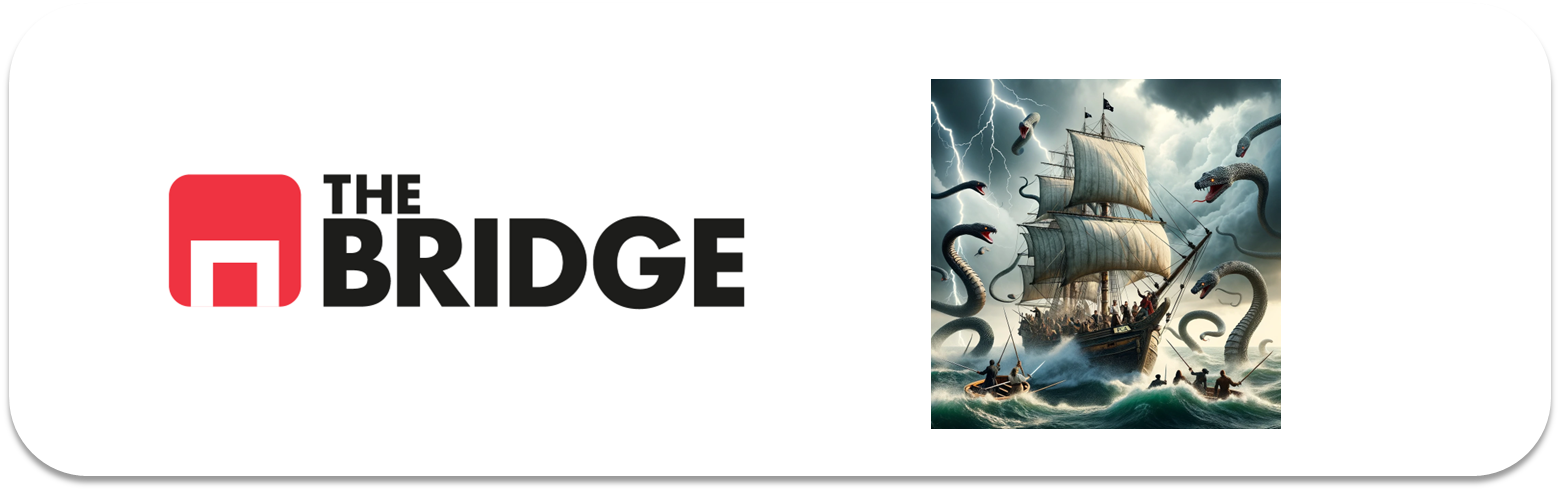

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [382]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif,SelectFromModel,RFE,RFECV,SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier

#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [383]:
df = pd.read_csv('data/credit_npo.csv')
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [385]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,11816.000000,12537.000000,12537.000000,12537.000000,12537.000000,12360.000000
mean,0.068916,0.330359,52.079445,0.409588,1.902253,6864.815420,8.482332,0.259312,0.999202,0.228364,0.822087
std,0.253321,0.368148,15.077498,4.055787,9.122216,11855.905437,5.165422,4.035658,1.134325,4.018873,1.136802
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030651,41.000000,0.000000,0.142268,3498.750000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.163490,51.000000,0.000000,0.302025,5416.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.582219,62.000000,0.000000,0.506725,8300.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,6.000000,101.000000,98.000000,99.000000,702500.000000,49.000000,98.000000,19.000000,98.000000,10.000000


In [386]:
# Analisis de missings

for col in df.columns:
        print(f"Para {col}, unknowns o missings:", end = " ")
        if "unknown" in df.columns:
            missings = df[col].value_counts()["unknown"]
        else:
            missings=0
        print(f"{missings}, {round(missings/len(df)*100.0,2)}%")
        
        if df[col].isnull().sum()>0:
            np_isna=df[col].isnull().sum()
        else:
            np_isna=0
        print(f"Para {col}, nulos:", end = " ")
        print(f"{np_isna}, {round(np_isna/len(df)*100.0,2)}%")


Para SeriousDlqin2yrs, unknowns o missings: 0, 0.0%
Para SeriousDlqin2yrs, nulos: 0, 0.0%
Para RevolvingUtilizationOfUnsecuredLines, unknowns o missings: 0, 0.0%
Para RevolvingUtilizationOfUnsecuredLines, nulos: 0, 0.0%
Para age, unknowns o missings: 0, 0.0%
Para age, nulos: 0, 0.0%
Para NumberOfTime30-59DaysPastDueNotWorse, unknowns o missings: 0, 0.0%
Para NumberOfTime30-59DaysPastDueNotWorse, nulos: 0, 0.0%
Para DebtRatio, unknowns o missings: 0, 0.0%
Para DebtRatio, nulos: 0, 0.0%
Para MonthlyIncome, unknowns o missings: 0, 0.0%
Para MonthlyIncome, nulos: 721, 5.75%
Para NumberOfOpenCreditLinesAndLoans, unknowns o missings: 0, 0.0%
Para NumberOfOpenCreditLinesAndLoans, nulos: 0, 0.0%
Para NumberOfTimes90DaysLate, unknowns o missings: 0, 0.0%
Para NumberOfTimes90DaysLate, nulos: 0, 0.0%
Para NumberRealEstateLoansOrLines, unknowns o missings: 0, 0.0%
Para NumberRealEstateLoansOrLines, nulos: 0, 0.0%
Para NumberOfTime60-89DaysPastDueNotWorse, unknowns o missings: 0, 0.0%
Para NumberOf

In [387]:
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [388]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [389]:
target='SeriousDlqin2yrs'



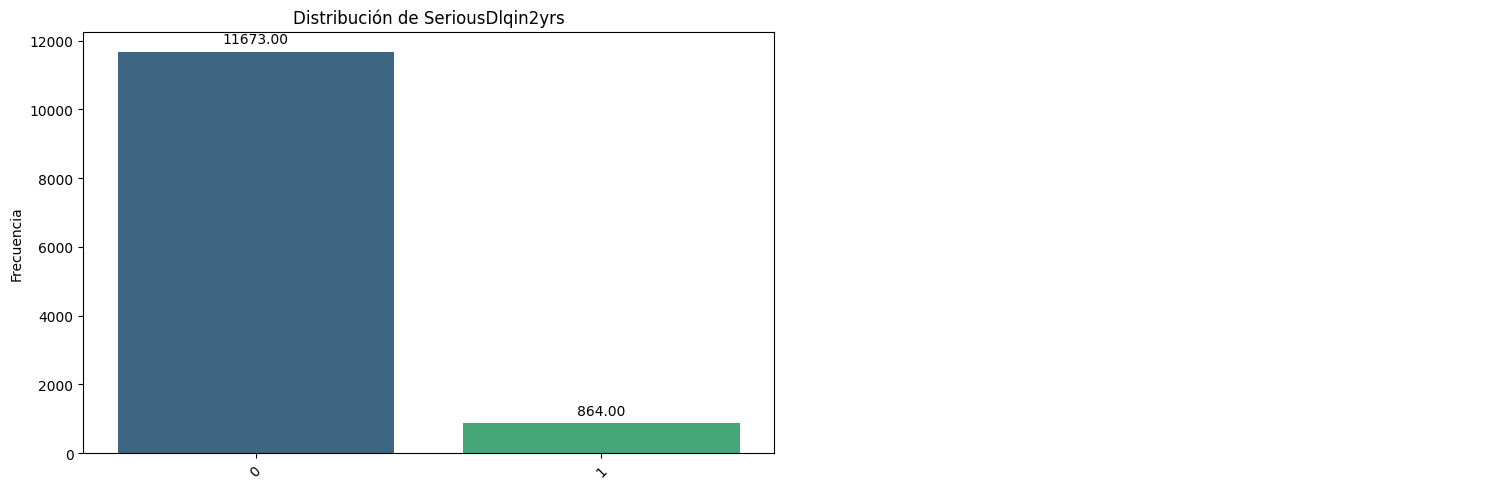

In [390]:
bt.pinta_distribucion_categoricas(df,[target], mostrar_valores= True)

In [391]:
df[df['NumberOfDependents'].isnull()]['NumberOfDependents']

20      NaN
66      NaN
90      NaN
240     NaN
298     NaN
         ..
12346   NaN
12378   NaN
12426   NaN
12448   NaN
12528   NaN
Name: NumberOfDependents, Length: 177, dtype: float64

In [392]:
df[df['MonthlyIncome'].isnull()]['MonthlyIncome']

20      NaN
25      NaN
29      NaN
32      NaN
66      NaN
         ..
12473   NaN
12499   NaN
12519   NaN
12528   NaN
12529   NaN
Name: MonthlyIncome, Length: 721, dtype: float64

In [393]:
columns_to_clean=['NumberOfDependents','MonthlyIncome']
df.dropna(subset=columns_to_clean, inplace=True)

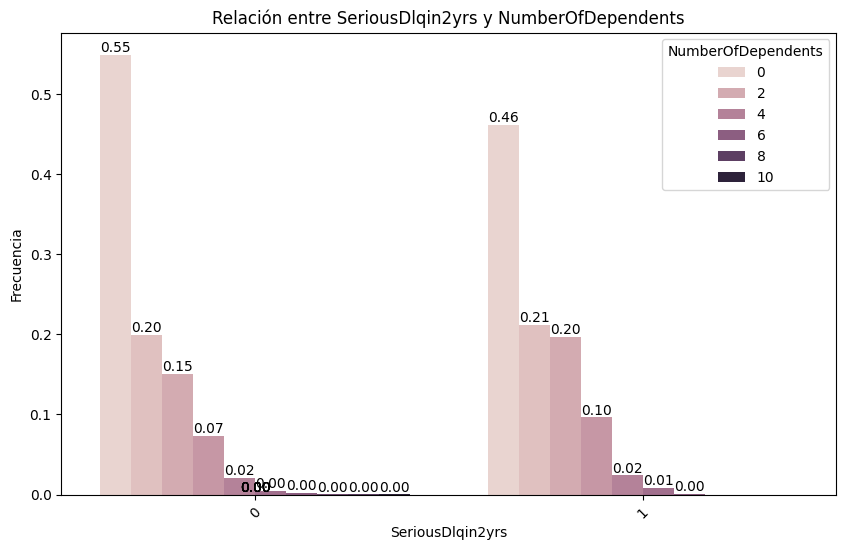

In [394]:
bt.plot_categorical_relationship_fin(df, target, 'NumberOfDependents', show_values= True, relative_freq= True)

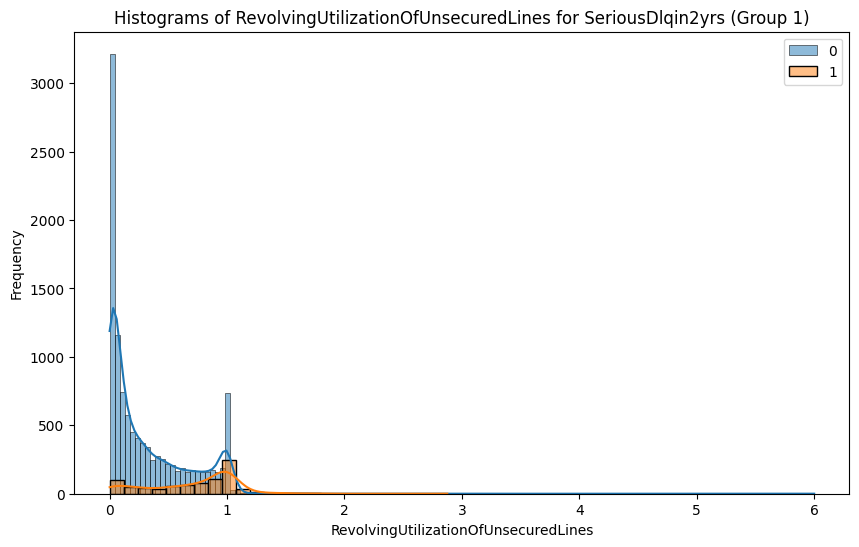

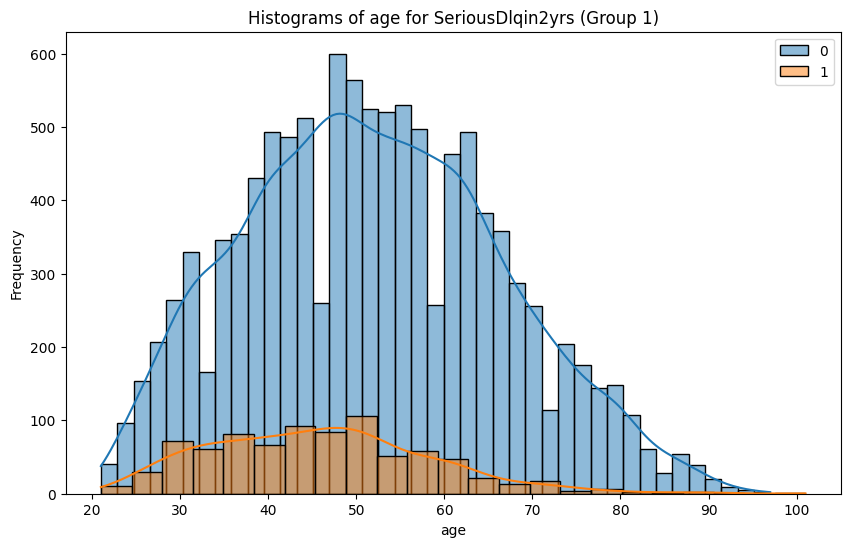

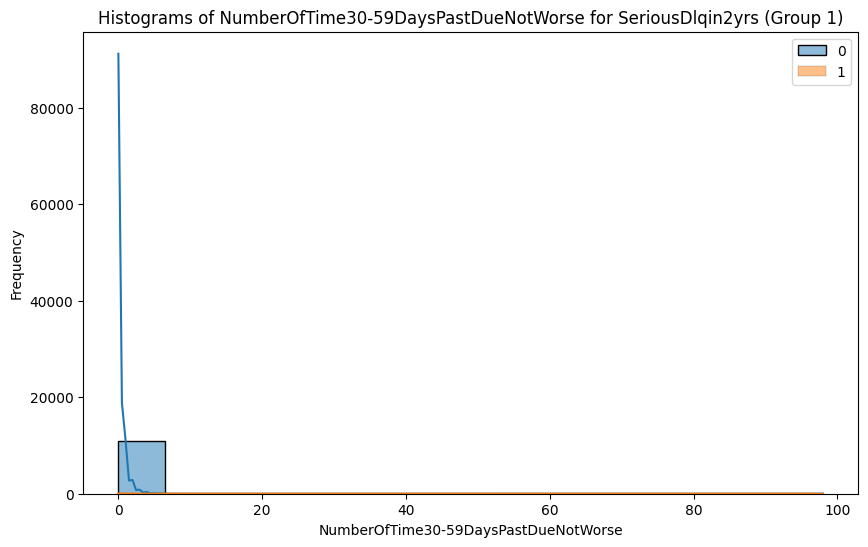

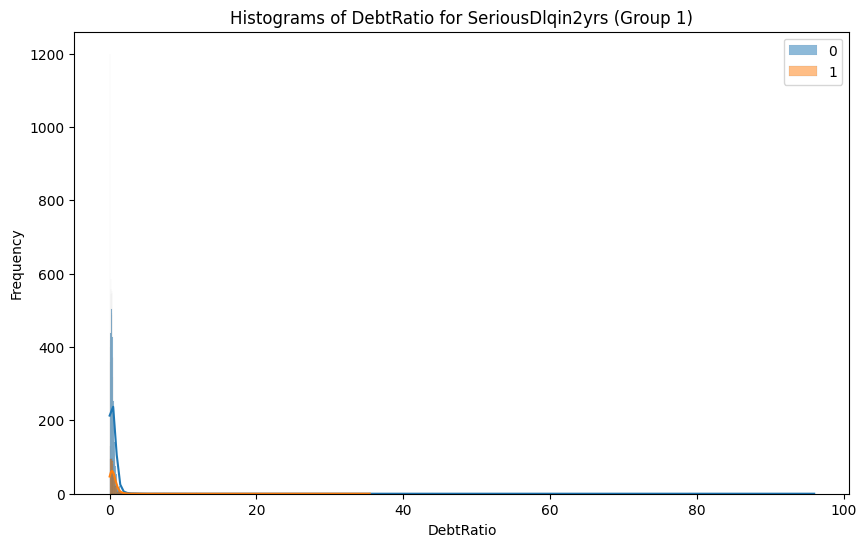

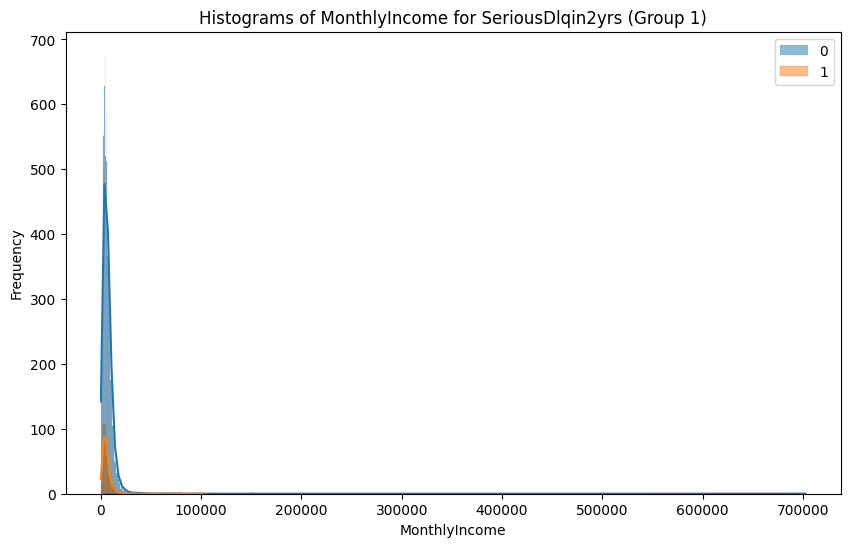

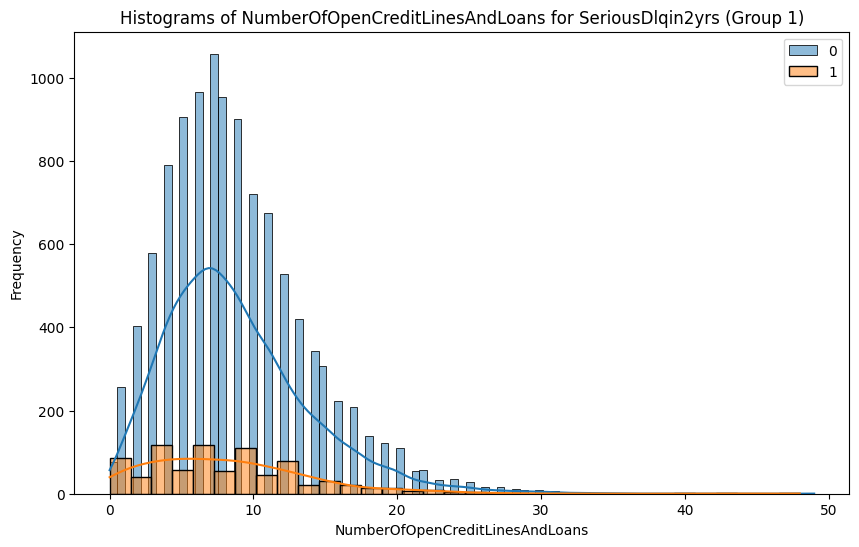

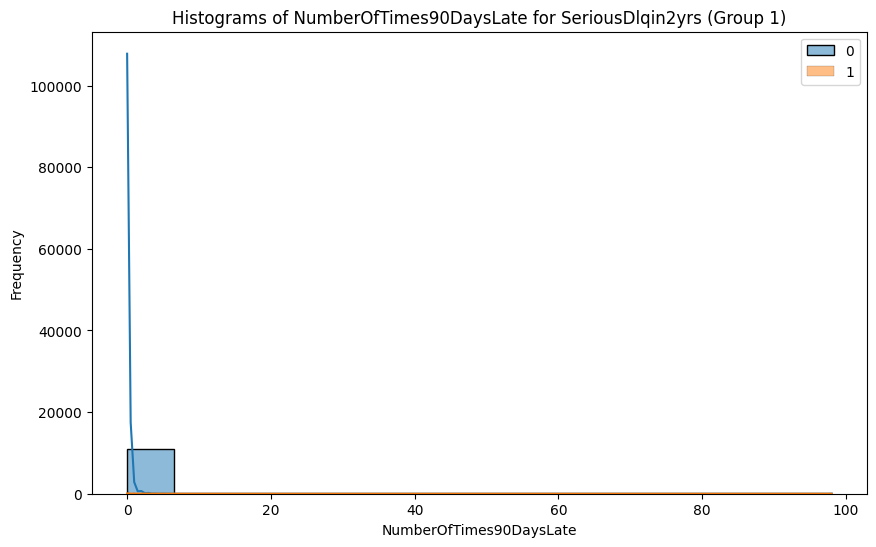

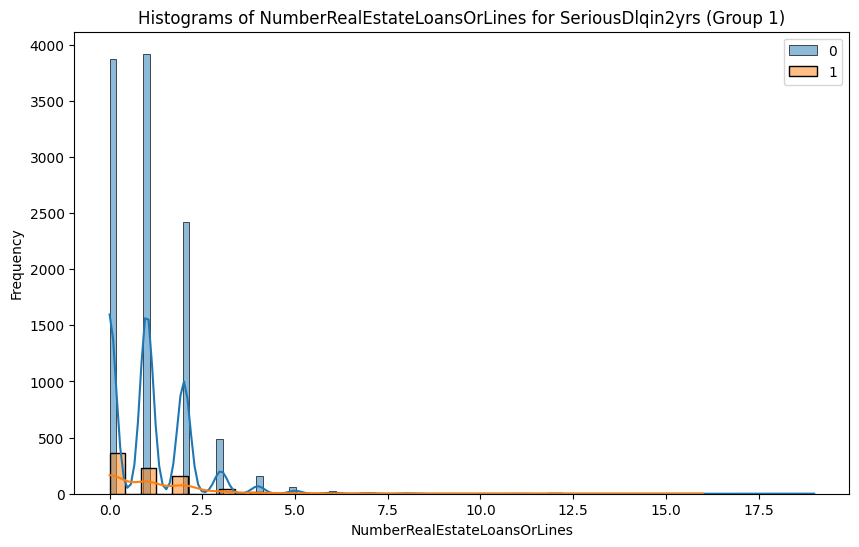

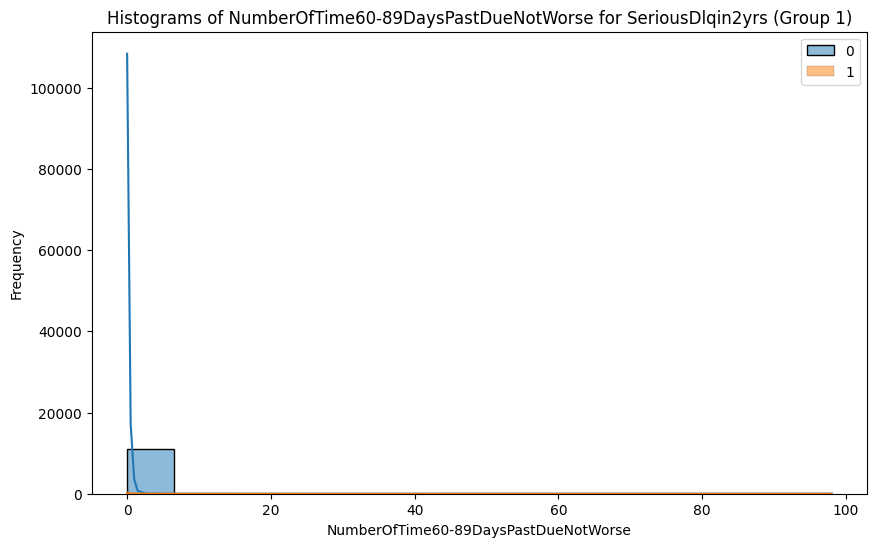

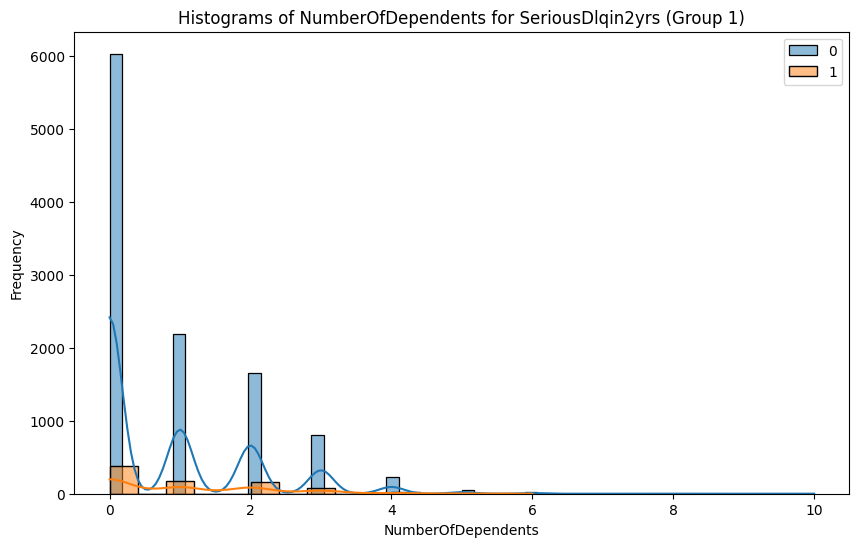

In [395]:
features = [col for col in df.columns if col != target]
for col in features:
    bt.plot_grouped_histograms(df, cat_col= target, num_col= col, group_size= 2)

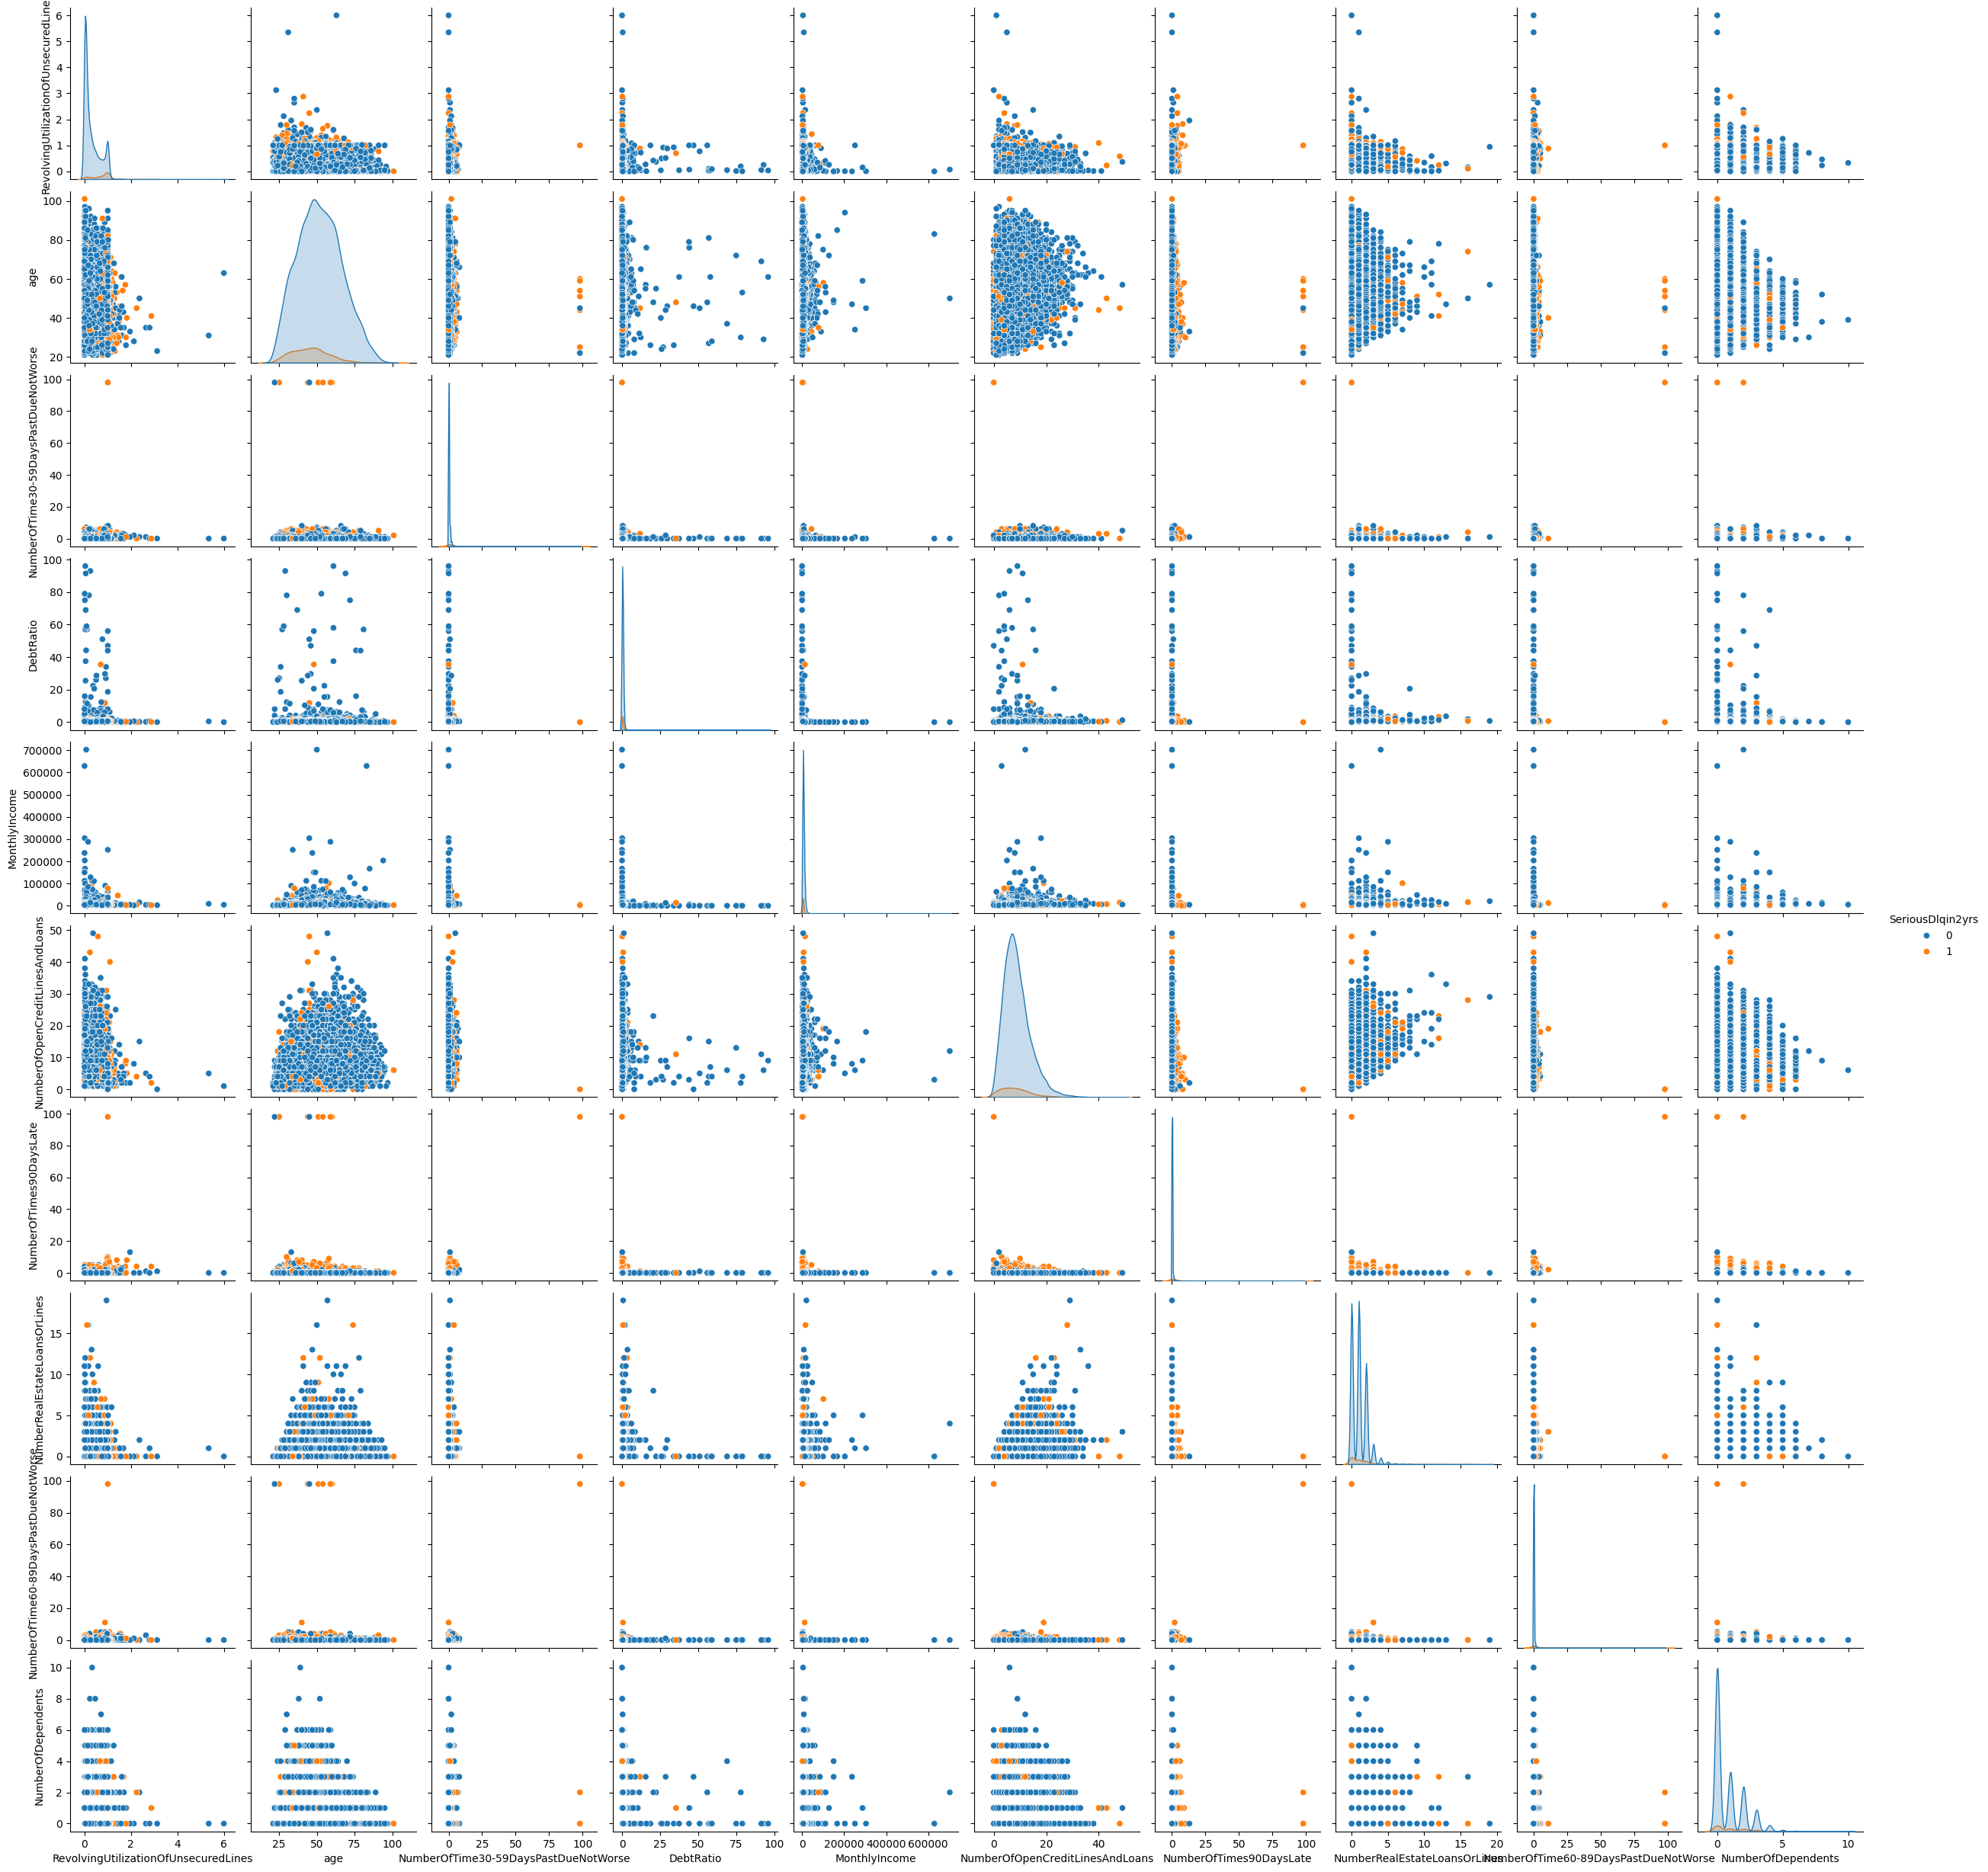

In [396]:
sns.pairplot(df, hue = target)

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [397]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [398]:
features_num=['RevolvingUtilizationOfUnsecuredLines',
              'DebtRatio',
              'NumberOfOpenCreditLinesAndLoans',
              'NumberRealEstateLoansOrLines']
features_cat=['NumberOfTime30-59DaysPastDueNotWorse',
              'NumberOfTimes90DaysLate',
              'NumberOfTime60-89DaysPastDueNotWorse']

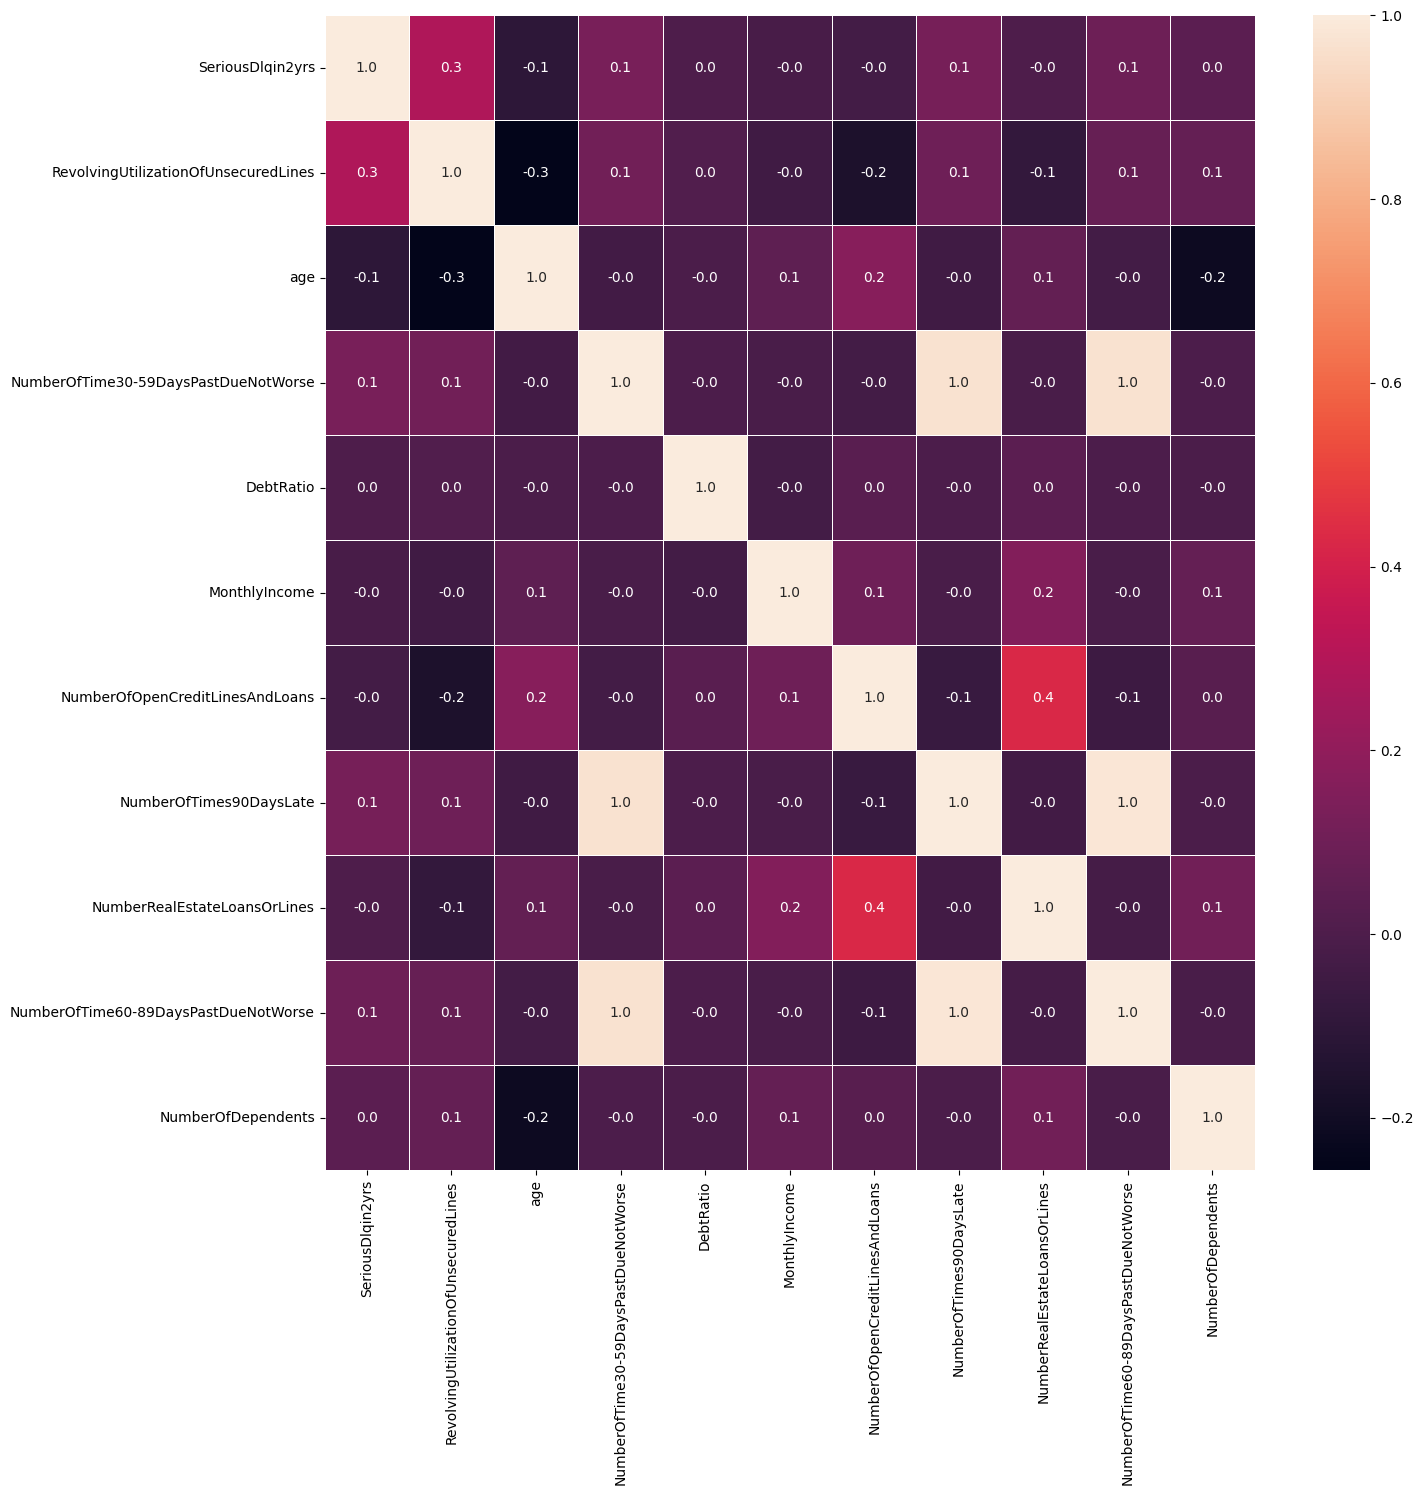

In [399]:
plt.figure(figsize=(15, 15))
sns.heatmap(train_set.corr(numeric_only=True), annot=True, linewidths=.5, fmt= '.1f');

In [400]:
df_corr=train_set.corr(numeric_only=True)
df_corr['SeriousDlqin2yrs'].sort_values(ascending=False)


SeriousDlqin2yrs                        1.000000
RevolvingUtilizationOfUnsecuredLines    0.284084
NumberOfTime30-59DaysPastDueNotWorse    0.126015
NumberOfTimes90DaysLate                 0.125070
NumberOfTime60-89DaysPastDueNotWorse    0.094215
NumberOfDependents                      0.038829
DebtRatio                               0.001863
NumberRealEstateLoansOrLines           -0.001677
MonthlyIncome                          -0.018163
NumberOfOpenCreditLinesAndLoans        -0.032472
age                                    -0.107801
Name: SeriousDlqin2yrs, dtype: float64

In [401]:
cov_matrix = train_set.cov()
cov_matrix

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,0.065231,0.026282,-0.399205,0.094316,0.001192,-5.835825e+01,-0.042625,0.092316,-0.000492,0.069063,0.011486
RevolvingUtilizationOfUnsecuredLines,0.026282,0.131213,-1.350656,0.117272,0.009222,-2.002346e+02,-0.300071,0.102049,-0.037395,0.079556,0.029583
age,-0.399205,-1.350656,210.229639,-1.737809,-0.379770,9.451942e+03,12.856107,-1.748977,1.066040,-1.457706,-3.637015
NumberOfTime30-59DaysPastDueNotWorse,0.094316,0.117272,-1.737809,8.587763,-0.031421,-4.764382e+02,-0.471022,8.188445,-0.049808,8.161597,-0.007807
DebtRatio,0.001192,0.009222,-0.379770,-0.031421,6.275182,-1.066253e+03,0.442417,-0.043145,0.117439,-0.041149,-0.021970
MonthlyIncome,-58.358248,-200.234555,9451.942360,-476.438160,-1066.253113,1.582701e+08,6237.402588,-576.234939,2258.329462,-501.144970,1007.635131
NumberOfOpenCreditLinesAndLoans,-0.042625,-0.300071,12.856107,-0.471022,0.442417,6.237403e+03,26.415026,-0.994824,2.535589,-0.779967,0.173092
NumberOfTimes90DaysLate,0.092316,0.102049,-1.748977,8.188445,-0.043145,-5.762349e+02,-0.994824,8.352006,-0.129469,8.164816,-0.027749
NumberRealEstateLoansOrLines,-0.000492,-0.037395,1.066040,-0.049808,0.117439,2.258329e+03,2.535589,-0.129469,1.318262,-0.101141,0.145386
NumberOfTime60-89DaysPastDueNotWorse,0.069063,0.079556,-1.457706,8.161597,-0.041149,-5.011450e+02,-0.779967,8.164816,-0.101141,8.237583,-0.040183


In [402]:
train_set['NumberOfTime30-89DaysPastDueNotWorse']=0
indices30=[]
indices60=[]
for index,row in train_set.iterrows():
    if row['NumberOfTime30-59DaysPastDueNotWorse']==1:
        indices30.append(index)
    if row['NumberOfTime60-89DaysPastDueNotWorse']==1:
        indices60.append(index)
train_set.loc[indices30,'NumberOfTime30-89DaysPastDueNotWorse']=30
train_set.loc[indices60,'NumberOfTime30-89DaysPastDueNotWorse']=60
test_set['NumberOfTime30-89DaysPastDueNotWorse']=0
indices30=[]
indices60=[]
for index,row in test_set.iterrows():
    if row['NumberOfTime30-59DaysPastDueNotWorse']==1:
        indices30.append(index)
    if row['NumberOfTime60-89DaysPastDueNotWorse']==1:
        indices60.append(index)
test_set.loc[indices30,'NumberOfTime30-89DaysPastDueNotWorse']=30
test_set.loc[indices60,'NumberOfTime30-89DaysPastDueNotWorse']=60






In [403]:
train_set.drop('NumberOfTime30-59DaysPastDueNotWorse',axis=1,inplace=True)
train_set.drop('NumberOfTime60-89DaysPastDueNotWorse',axis=1,inplace=True)
test_set.drop('NumberOfTime30-59DaysPastDueNotWorse',axis=1,inplace=True)
test_set.drop('NumberOfTime60-89DaysPastDueNotWorse',axis=1,inplace=True)

In [404]:
cov_matrix = train_set.cov()
cov_matrix

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents,NumberOfTime30-89DaysPastDueNotWorse
SeriousDlqin2yrs,0.065231,0.026282,-0.399205,0.001192,-5.835825e+01,-0.042625,0.092316,-0.000492,0.011486,0.699235
RevolvingUtilizationOfUnsecuredLines,0.026282,0.131213,-1.350656,0.009222,-2.002346e+02,-0.300071,0.102049,-0.037395,0.029583,1.135340
age,-0.399205,-1.350656,210.229639,-0.379770,9.451942e+03,12.856107,-1.748977,1.066040,-3.637015,-16.867846
DebtRatio,0.001192,0.009222,-0.379770,6.275182,-1.066253e+03,0.442417,-0.043145,0.117439,-0.021970,-0.136183
MonthlyIncome,-58.358248,-200.234555,9451.942360,-1066.253113,1.582701e+08,6237.402588,-576.234939,2258.329462,1007.635131,-2707.763264
NumberOfOpenCreditLinesAndLoans,-0.042625,-0.300071,12.856107,0.442417,6.237403e+03,26.415026,-0.994824,2.535589,0.173092,-0.687505
NumberOfTimes90DaysLate,0.092316,0.102049,-1.748977,-0.043145,-5.762349e+02,-0.994824,8.352006,-0.129469,-0.027749,0.973673
NumberRealEstateLoansOrLines,-0.000492,-0.037395,1.066040,0.117439,2.258329e+03,2.535589,-0.129469,1.318262,0.145386,-0.237128
NumberOfDependents,0.011486,0.029583,-3.637015,-0.021970,1.007635e+03,0.173092,-0.027749,0.145386,1.341516,0.590612
NumberOfTime30-89DaysPastDueNotWorse,0.699235,1.135340,-16.867846,-0.136183,-2.707763e+03,-0.687505,0.973673,-0.237128,0.590612,206.991810


In [405]:
train_set_corr=train_set.corr(numeric_only=True)
train_set_corr['SeriousDlqin2yrs'].sort_values(ascending=False)

SeriousDlqin2yrs                        1.000000
RevolvingUtilizationOfUnsecuredLines    0.284084
NumberOfTime30-89DaysPastDueNotWorse    0.190292
NumberOfTimes90DaysLate                 0.125070
NumberOfDependents                      0.038829
DebtRatio                               0.001863
NumberRealEstateLoansOrLines           -0.001677
MonthlyIncome                          -0.018163
NumberOfOpenCreditLinesAndLoans        -0.032472
age                                    -0.107801
Name: SeriousDlqin2yrs, dtype: float64

In [406]:
X_train = train_set.drop(target,axis=1)
y_train = train_set[target]
X_test = test_set.drop(target,axis=1)
y_test = test_set[target]



In [407]:
X_test

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents,NumberOfTime30-89DaysPastDueNotWorse
8653,0.146506,77,0.091313,6307.0,14,0,0,0.0,0
9542,0.000000,31,0.000000,2166.0,4,0,0,0.0,0
11932,0.527101,50,0.467540,5498.0,15,1,1,1.0,60
796,0.594313,44,0.991717,3500.0,9,0,1,1.0,0
8882,0.251177,73,0.616590,3700.0,8,0,3,0.0,0
...,...,...,...,...,...,...,...,...,...
1286,0.153984,56,0.293055,6090.0,10,0,1,0.0,0
10119,0.143378,51,0.229799,15308.0,19,0,3,3.0,0
8600,0.528468,61,0.849322,4200.0,8,0,2,0.0,0
6818,0.303600,38,0.474848,5108.0,7,0,2,1.0,0


In [408]:
features_ejer_1=['RevolvingUtilizationOfUnsecuredLines',
          'age',
          'MonthlyIncome',
          'NumberOfTime30-89DaysPastDueNotWorse',
          'NumberOfTimes90DaysLate']


In [409]:
X_train.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfDependents', 'NumberOfTime30-89DaysPastDueNotWorse'],
      dtype='object')

In [410]:
X_train_ejer_1 = X_train[features_ejer_1]
rfc_ejer_1 = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
baseline = np.mean(cross_val_score(rfc_ejer_1,X_train,y_train, scoring = "balanced_accuracy", cv = 5))
print(f"Baseline: {baseline}%")

Baseline: 0.5528044955182463%


  2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 

In [411]:

X_train.isnull().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfDependents                      0
NumberOfTime30-89DaysPastDueNotWorse    0
dtype: int64

In [412]:
# Encontrar las 6 mejores características
num_feats_anova = 6
select_feature = SelectKBest(f_classif, k=num_feats_anova).fit(X_train, y_train)
best_features_sorted = pd.DataFrame({'Feature': X_train.columns, 'Score': select_feature.scores_}).sort_values(by='Score', ascending=False)
features_anova = select_feature.get_feature_names_out()
best_features_sorted.head()

,Feature,Score
0,RevolvingUtilizationOfUnsecuredLines,829.602605
8,NumberOfTime30-89DaysPastDueNotWorse,355.051779
5,NumberOfTimes90DaysLate,150.171311
1,age,111.110548
7,NumberOfDependents,14.268878


In [413]:
print(features_anova)

['RevolvingUtilizationOfUnsecuredLines' 'age'
 'NumberOfOpenCreditLinesAndLoans' 'NumberOfTimes90DaysLate'
 'NumberOfDependents' 'NumberOfTime30-89DaysPastDueNotWorse']


In [414]:
features_ejer_2=['RevolvingUtilizationOfUnsecuredLines',
          'age',
          'NumberOfTime30-89DaysPastDueNotWorse',
          'NumberOfTimes90DaysLate']


In [415]:
X_train_ejer_2 = X_train[features_ejer_2]
rfc_ejer_2 = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rfc_ejer_2_score = np.mean(cross_val_score(rfc_ejer_2,X_train,y_train, scoring = "balanced_accuracy", cv = 5))
print(f"rfc_ejer_2_score: {rfc_ejer_2_score}%")

rfc_ejer_2_score: 0.5528044955182463%


    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)

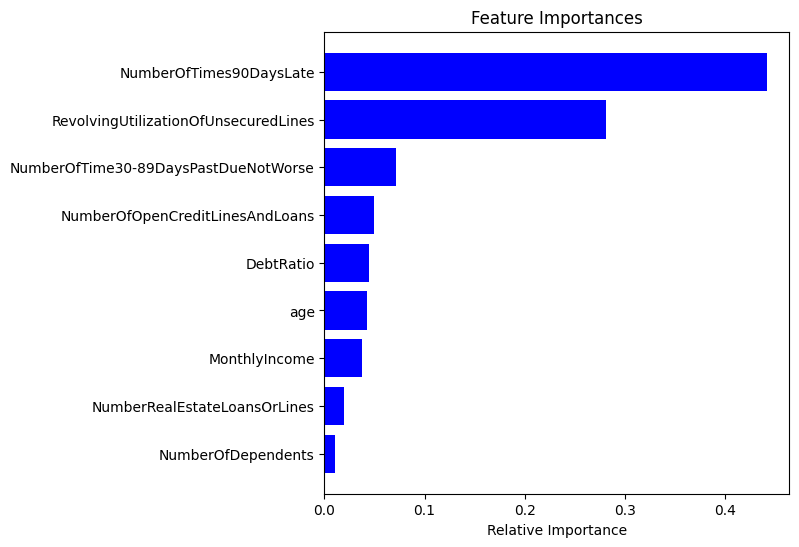

Escogidas: ['RevolvingUtilizationOfUnsecuredLines' 'DebtRatio'
 'NumberOfOpenCreditLinesAndLoans' 'NumberOfTimes90DaysLate'
 'NumberOfTime30-89DaysPastDueNotWorse']


In [416]:
#mostramos la importancia de las características del modelo original (sin reducción de características)
rfc_ejer_3 = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rfc_ejer_3.fit(X_train,y_train)
importances = rfc_ejer_3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


selector_model = SelectFromModel(estimator = rfc_ejer_3, threshold= "median") 
selector_model.fit(X_train,y_train)
print("Escogidas:", selector_model.get_feature_names_out())

In [417]:
features_ejer_3=['RevolvingUtilizationOfUnsecuredLines',
                 'DebtRatio',
                 'NumberOfOpenCreditLinesAndLoans',
                 'NumberOfTimes90DaysLate',
                 'NumberOfTime30-89DaysPastDueNotWorse']

    4. Selección de las mejores features empleando RFE.

In [418]:
#Random Forest Classifier
rfc_ejer_4 = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)

#Recursive Feature Elimination y entrenar el modelo
num_feats_rfe = 6
rfe = RFE(estimator=rfc_ejer_4, n_features_to_select= num_feats_rfe, step=1)
rfe = rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)
rfe_score = np.mean(cross_val_score(rfc_ejer_4, X_train_rfe, y_train, cv = 5, scoring= "balanced_accuracy"))

print(f"ANOVA: {rfe_score*100.0}%/{num_feats_anova} feats. vs Baseline: {baseline*100.0}%/{len(features_ejer_1)} feats.")


ANOVA: 55.866590807311134%/6 feats. vs Baseline: 55.28044955182463%/5 feats.


In [419]:
features_ejer_4 = rfe.get_feature_names_out()
features_ejer_4

array(['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberOfTime30-89DaysPastDueNotWorse'], dtype=object)

   5. Selección de las mejores features empleando SFS.

In [422]:
# Initialize a classifier (Random Forest in this example)
rfc_ejer_5 = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)

'''
rf_SFS = RandomForestClassifier(random_state = 42)

sfs_forward = SequentialFeatureSelector(rf_SFS,
                                        n_features_to_select = 5,
                                        cv = 4,
                                        scoring = "balanced_accuracy")


sfs_forward.fit(X_train_wines, y_train_wines)
'''
# Initialize Sequential Feature Selector
sfs = SequentialFeatureSelector(rfc_ejer_5,
                                n_features_to_select = 5,
                                cv = 5,
                                scoring = "balanced_accuracy")
# Fit the SFS to the training data
sfs.fit(X_train, y_train)

# Get the selected feature indices
features_ejer_5 = X_train.columns[sfs.get_support(indices=True)]

# Transform the training and testing sets to include only selected features
X_train_sfs = sfs.transform(X_train)

# Fit a classifier on the selected features
rfc_ejer_5.fit(X_train_sfs, y_train)

sfs_score = np.mean(cross_val_score(rfc_ejer_5, X_train_sfs, y_train, cv = 5, scoring= "balanced_accuracy"))
print(f"ANOVA: {sfs_score*100.0}%/{len(features_ejer_5)} feats. vs Baseline: {baseline*100.0}%/{len(features_ejer_1)} feats.")



ANOVA: 56.73083968058552%/5 feats. vs Baseline: 55.28044955182463%/5 feats.


    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

In [423]:
X_train_ejer_1 = X_train[features_ejer_1]
#X_train_ejer_2 = X_train[:, subset_features_gb]
X_train_ejer_3 = X_train[features_ejer_3]
X_train_ejer_4= X_train_rfe
X_train_ejer_5=X_train_sfs

X_test_ejer_1 = X_test[features_ejer_1]
X_test_ejer_2 = X_test[features_ejer_2]
X_test_ejer_3 = X_test[features_ejer_3]
X_test_ejer_4 = X_test[features_ejer_4]
X_test_ejer_5 = X_test[features_ejer_5]
# Initialize the VotingClassifier with hard voting
voting_classifier = VotingClassifier(estimators=[
    ('RandomForest', rfc_ejer_1),
    ('SelectKBest', rfc_ejer_2),
    ('selector_model', rfc_ejer_3),
    ('SelectKBest', rfc_ejer_4),
    ('SequentialFeatureSelector', rfc_ejer_5),
], voting='hard')  # Specify 'hard' for hard voting
rfc_ejer_1.fit(X_train_ejer_1,y_train)
rfc_ejer_2.fit(X_train_ejer_2,y_train)
rfc_ejer_3.fit(X_train_ejer_3,y_train)
rfc_ejer_4.fit(X_train_ejer_4,y_train)
rfc_ejer_5.fit(X_train_ejer_5,y_train)
y_pred_rfc_ejer_1 = rfc_ejer_1.predict(X_train_ejer_1)
y_pred_rfc_ejer_2 = rfc_ejer_1.predict(X_train_ejer_2)
y_pred_rfc_ejer_3 = rfc_ejer_1.predict(X_train_ejer_3)
y_pred_rfc_ejer_4 = rfc_ejer_1.predict(X_train_ejer_4)
y_pred_rfc_ejer_5 = rfc_ejer_1.predict(X_train_ejer_5)
# Combine predictions through hard voting
y_pred_voting = voting_classifier.predict(X_test)
#voting_classifier.fit(X_train, y_train)
accuracies={}
accuracies['rfc_ejer_1'] = accuracy_score(y_test, y_pred_rfc_ejer_1)
accuracies['rfc_ejer_2'] = accuracy_score(y_test, y_pred_rfc_ejer_2)
accuracies['rfc_ejer_3'] = accuracy_score(y_test, y_pred_rfc_ejer_3)
accuracies['rfc_ejer_4'] = accuracy_score(y_test, y_pred_rfc_ejer_4)
accuracies['rfc_ejer_5'] = accuracy_score(y_test, y_pred_rfc_ejer_5)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
for key,value in accuracies.values():
    print(f"{key}:{value} vs accuracy_voting: {accuracy_voting}")


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- MonthlyIncome


### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.